**Multi-Armed Bandit Model**

For this experiment there will be three bandits with differing statistical properties.  The first bandit, bandit[0], will have a mean reward of zero, the second bandit, bandit[1], will have a mean reward of one, and the third bandit, bandit[2], will have a mean reward of minus one, which is a penalty.  The standard deviation of the distributions are all set to one.  The figure below shows these three probability distributions.  Obviously, the green distribution corresponds to bandit[0], the yellow/orange distribution corresponds to bandit[1], and the blue distribution corresponds to bandit[2].

![Normal Distributions](threebandits.png)

You are presented these three bandits not knowing the which bandit is which.  Moreover, you do not know what the uderlying probability distributions are.  You are given a fixed number of pulls of one of the arms.  On each iteration, you select an arm, pull it, and get a reward.  Your task is to maximize the reward, also known as the __value__, that you receive.  To maximize your reward you must devise a strategy, also known as a __policy__, for deciding which are to pull on each iteration. 

Here the policy will be what is called an epsilon greedy policy.  Current mean values will be kept and updated with each pull of each bandit.  With probability 1-eps, the bandit with the largest mean will be selected on an iteration.  This is exploitation.  With probability eps, one of the three bandits is chosen at random.  This is exploitation.

In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd

import random
from bandit import Bandit

#seed = 12345
#random.seed(seed)

In [2]:
N = 10000
eps = 0.25
num_bandits = 3

mean = [] # mean of each bandit
variance = [] # variance of each bandit
sample_variance = [] # sample variance of each bandit

Bandits = [] # list of bandit objects
mu = [10,5,1] # mean of each bandit
sigma = [1,1,1] # sdev of each bandit

In [3]:
for i in range(num_bandits):
    Bandits.append(Bandit(mu[i], sigma[i])) # create bandit objects

rewards = [] # list of rewards from the bandits

for i in range(num_bandits):
    Bandits[i].xn = Bandits[i].play()
    rewards.append(Bandits[i].xn)
    Bandits[i].mean = Bandits[i].xn
    mean.append(Bandits[i].xn)

for i in range(num_bandits,N):
    # do epsilon greedy
    val = random.random()  # returns random number in [0.0, 1.0)
    if val < eps:
        bandit_choice = random.choice([i for i in range(num_bandits)])
        x = Bandits[bandit_choice].play()
        rewards.append(x)
        mean[bandit_choice] = Bandits[bandit_choice].get_statistics()[0]
        #print(f'x: {x:.2f},bandit_choice: {bandit_choice},mean[bandit_choice]: {mean[bandit_choice]:.2f}')
    else:
        max_index = 0 # find index of the bandit with the highest mean
        max_value = Bandits[0].mean
        for j in range(1,num_bandits):
            if Bandits[j].mean > max_value:
                max_value = Bandits[j].mean
                max_index = j
        x = Bandits[max_index].play()
        rewards.append(x)
        mean[max_index] = Bandits[max_index].get_statistics()[0]
        #print(f'x: {x:.2f},bandit_max: {max_index},mean[max_index]: {mean[max_index]:.2f}')
        

In [4]:
summed_rewards = [rewards[0]]
for i in range(1,len(rewards)):
    summed_rewards.append(rewards[i] + summed_rewards[i-1])

average_rewards = []
for i in range(0,len(rewards)):
    average_rewards.append(summed_rewards[i]/(i+1))

In [5]:
print("Bandit 0 - pulled", Bandits[0].n, "times. Estimated mean -", Bandits[0].mean)
print("Bandit 1 - pulled", Bandits[1].n, "times. Estimated mean -", Bandits[1].mean)
print("Bandit 2 - pulled", Bandits[2].n, "times. Estimated mean -", Bandits[2].mean)
print("Total reward   - ", summed_rewards[N - 1])
print("Average reward - ", average_rewards[N - 1])

Bandit 0 - pulled 8338 times. Estimated mean - 8.987974275182658
Bandit 1 - pulled 801 times. Estimated mean - 5.4851779528636655
Bandit 2 - pulled 861 times. Estimated mean - 0.566368017225357
Total reward   -  88423.50637193202
Average reward -  8.842350637193201


In [6]:
# plots using seaborn
def multi_bandit_plots(count, data, averagereward):
    description = {"iteration": count, "value": data, "average reward": averagereward}
    pddata = pd.DataFrame(description)

    plt.rcParams["figure.figsize"] = [15, 5]

    sns.set(style="darkgrid")
    ax1 = sns.scatterplot(x="iteration", y="value", data=pddata)
    ax1.set(xscale="linear", yscale="linear")
    ax1.set_xlabel("")
    ax1.set_ylabel("")
    ax1.set_title("Data")

    plt.show()

    sns.set(style="darkgrid")
    ax2 = sns.lineplot(x="iteration", y="average reward", data=pddata)
    ax2.set(xscale="linear", yscale="linear")
    ax2.set_xlabel("")
    ax2.set_ylabel("")
    ax2.set_title("Average Reward")

    plt.show()

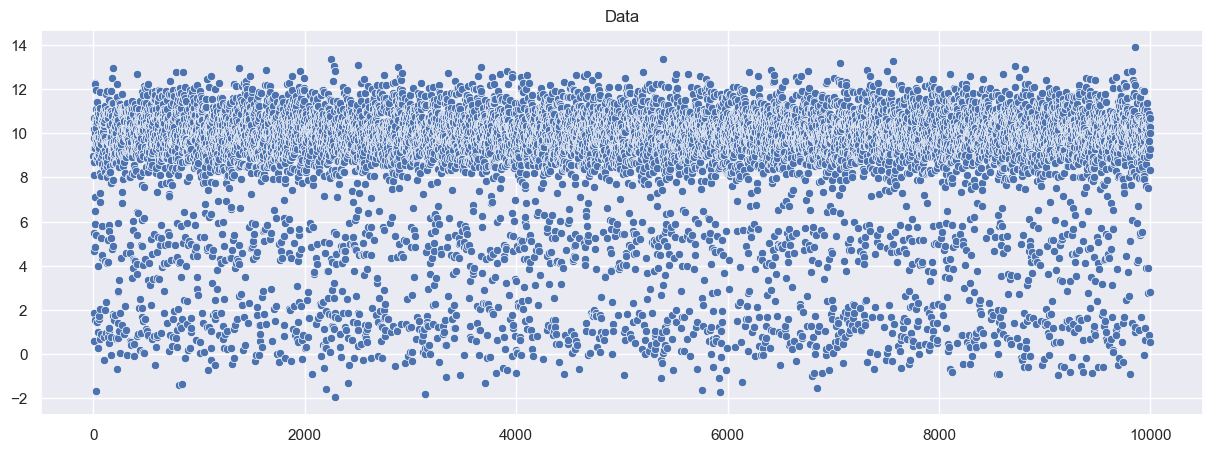

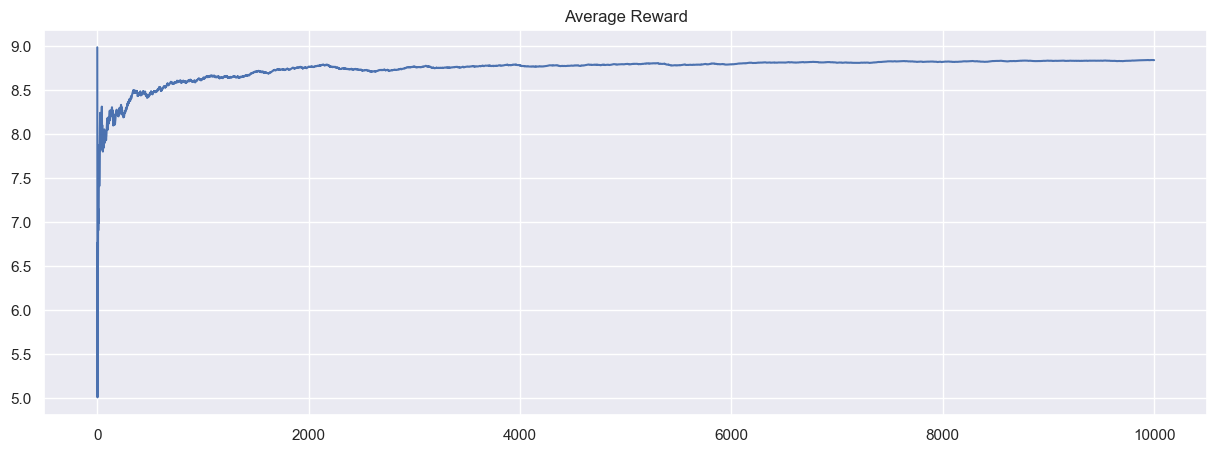

In [7]:

count = [x for x in range(len(rewards))]
multi_bandit_plots(count, rewards, average_rewards)